<a href="https://colab.research.google.com/github/cazofeifa/Compi/blob/master/Bee_Healthiness_Pre_processing%2C_Data_Augmentation%2C_Training_and_Metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>🐝 Bee Healthiness</h1>
<h3>Pre processing and Data Augmentation</h3>

Proyecto de <b>Investigación y Paper</b>
del curso de Informática para la Conservación de la Biodiversidad, 
de la Maestría de Ciencias de la Computación

<b>Profesor</b>: Dr. Eric Mata

<b>Estudiantes</b>:

*   Ing. Carlos Azofeifa
*   Ing. Edisson López



# General Setting
This is the section includes:
1.   Python imports
2.   Google drive connection
3.   Get Kaggle bee's dataset
4.   Sets GPU as accelerator if available

In [1]:
import os
import cv2
import time
import copy
import torch
import random
import pickle
import itertools
import numpy as np
import torchvision
import numpy as np
import torch.nn as nn
from PIL import Image
import tensorflow as tf
from sklearn import metrics
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.optim import lr_scheduler
from matplotlib.pyplot import imshow
from torchvision.utils import save_image
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from tensorflow.python.client import device_lib
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from torchvision import datasets, models, transforms
import albumentations as albu # to increase the quality
from albumentations.pytorch.transforms import ToTensor


# model = torch.hub.load('pytorch/vision:v0.9.0', 'resnet18', pretrained=True)

# SEED = 1234
# np.random.seed(SEED)
# torch.manual_seed(SEED)
# torch.cuda.manual_seed(SEED)
# torch.backends.cudnn.deterministic = True

In [2]:
from google.colab import files 
files.upload()

{}

In [3]:
#Gets the GPU's info if available
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Tue Jun 22 02:47:55 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    31W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
#Sets GPU as accelerator if available
tf.test.gpu_device_name()
device_lib.list_local_devices()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device, torch.cuda.is_available())

cuda:0 True


### Mounting Google Drive

In [5]:

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# Pre-Processing

This sections includes:
1.   Resize.
2.   Scale-Gray filter.
3.   Save files in new folder on Google Drive



### Gray scale

In [6]:

# YA SE EJECUTÓ, NO VOLVER A HACER

"""


# GRAY SCALE

from google.colab.patches import cv2_imshow

CLASS_NAMES = ["ant problems", "few varrao, hive beetles", "healthy", "hive being robbed", "missing queen", "Varroa, Small Hive Beetles"]

def FiltroEscalaGrises(imagePath):
  image = cv2.imread(imagePath)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  return gray

BASE_PATH = "/content/drive/MyDrive/bee_dataset/dataClassified/"

for className in CLASS_NAMES:
  _, _, filenames = next(os.walk(BASE_PATH+className))
  for imageFileName in filenames:
    imagePath = BASE_PATH + className + "/" + imageFileName
    cv2.imwrite(imagePath, FiltroEscalaGrises(imagePath))
    
"""


'\n\n\n# GRAY SCALE\n\nfrom google.colab.patches import cv2_imshow\n\nCLASS_NAMES = ["ant problems", "few varrao, hive beetles", "healthy", "hive being robbed", "missing queen", "Varroa, Small Hive Beetles"]\n\ndef FiltroEscalaGrises(imagePath):\n  image = cv2.imread(imagePath)\n  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)\n  return gray\n\nBASE_PATH = "/content/drive/MyDrive/bee_dataset/dataClassified/"\n\nfor className in CLASS_NAMES:\n  _, _, filenames = next(os.walk(BASE_PATH+className))\n  for imageFileName in filenames:\n    imagePath = BASE_PATH + className + "/" + imageFileName\n    cv2.imwrite(imagePath, FiltroEscalaGrises(imagePath))\n    \n'

### Resize

In [7]:

# YA SE EJECUTÓ, NO VOLVER A HACER

"""

# RESIZE

from google.colab.patches import cv2_imshow

CLASS_NAMES = ["ant problems", "few varrao, hive beetles", "healthy", "hive being robbed", "missing queen", "Varroa, Small Hive Beetles"]
DIM = (300, 300)

def Resize(imagePath):
  image = cv2.imread(imagePath, cv2.IMREAD_UNCHANGED)
  resized = cv2.resize(image, DIM, interpolation = cv2.INTER_AREA)
  return resized

BASE_PATH = "/content/drive/MyDrive/bee_dataset/dataClassified/"
OUT_BASE_PATH = "/content/drive/MyDrive/bee_dataset/dataClassifiedResized/"

for className in CLASS_NAMES:
  _, _, filenames = next(os.walk(BASE_PATH+className))
  
  print("Clase " + className + " iniciada")
  
  for imageFileName in filenames:
    imagePath = BASE_PATH + className + "/" + imageFileName
    out_imagePath = OUT_BASE_PATH + className + "/" + imageFileName
    cv2.imwrite(out_imagePath, Resize(imagePath))
  
  print("Clase " + className + " terminada")

"""


'\n\n# RESIZE\n\nfrom google.colab.patches import cv2_imshow\n\nCLASS_NAMES = ["ant problems", "few varrao, hive beetles", "healthy", "hive being robbed", "missing queen", "Varroa, Small Hive Beetles"]\nDIM = (300, 300)\n\ndef Resize(imagePath):\n  image = cv2.imread(imagePath, cv2.IMREAD_UNCHANGED)\n  resized = cv2.resize(image, DIM, interpolation = cv2.INTER_AREA)\n  return resized\n\nBASE_PATH = "/content/drive/MyDrive/bee_dataset/dataClassified/"\nOUT_BASE_PATH = "/content/drive/MyDrive/bee_dataset/dataClassifiedResized/"\n\nfor className in CLASS_NAMES:\n  _, _, filenames = next(os.walk(BASE_PATH+className))\n  \n  print("Clase " + className + " iniciada")\n  \n  for imageFileName in filenames:\n    imagePath = BASE_PATH + className + "/" + imageFileName\n    out_imagePath = OUT_BASE_PATH + className + "/" + imageFileName\n    cv2.imwrite(out_imagePath, Resize(imagePath))\n  \n  print("Clase " + className + " terminada")\n\n'

# Data augmentation

This section includes:


1.   Rotation
2.   Flip
3.   ...



### Classnames

In [8]:
# Classes of data set

CLASS_NAMES = [
               "Ant problems",
               "Few varroa, hive beetles",
               "Varroa, small hive beetles",
               "Hive being robbed",
               "Missing queen",
               "Healthy"
]


print(" We have " + str(len(CLASS_NAMES)) + " classes")

DIRS = [
    "ant problems",
    "few varrao, hive beetles",
    "Varroa, Small Hive Beetles",
    "hive being robbed",
    "missing queen",
    "healthy"
]

CLASS_NAMES_BY_DIRS = {
    "Ant problems" : "ant problems",
    "Few varroa, hive beetles" : "few varrao, hive beetles",
    "Varroa, small hive beetles" : "Varroa, Small Hive Beetles",
    "Hive being robbed" : "hive being robbed",
    "Missing queen" :  "missing queen",
    "Healthy" : "healthy"
}


 We have 6 classes


### Class of dataset

In [9]:
class BeeDataset(torch.utils.data.Dataset):
  def __init__(self, transform):
    self.basePath = "/content/drive/MyDrive/bee_dataset/dataClassified/"
    self.classCount = []
    self.images = {}
    self.targets = []
    self.transform = transform

    for i, class_name in enumerate(DIRS):
      self.images[CLASS_NAMES[i]] = [x for x in os.listdir(self.basePath + str(class_name))]
      classLen = len(self.images[CLASS_NAMES[i]])
      self.classCount.append(classLen)
      self.targets += [i] * classLen
      print(f'Found {classLen} {CLASS_NAMES[i]} examples')
        
  def __len__(self):
    return sum([len(self.images[className]) for className in CLASS_NAMES])
    
  def __getitem__(self, index):
    for i in range(len(CLASS_NAMES)):
      index -= self.classCount[i]
      if index < 0:
        className = CLASS_NAMES[i]
        imageName = self.images[className][index + self.classCount[i]]
        imagePath = os.path.join(self.basePath + str(DIRS[i]), imageName)
        image = Image.open(imagePath).convert('RGB')
        return self.transform(image), i

print("Executed")

Executed


### Applying with torchvision

In [10]:
"""
References:
 - Some Data Augmentation Techniques: https://research.aimultiple.com/data-augmentation-techniques/
 - Data Augmentation | How to use Deep Learning when you have Limited Data — Part 2: https://nanonets.com/blog/data-augmentation-how-to-use-deep-learning-when-you-have-limited-data-part-2/

"""

'\nReferences:\n - Some Data Augmentation Techniques: https://research.aimultiple.com/data-augmentation-techniques/\n - Data Augmentation | How to use Deep Learning when you have Limited Data\u200a—\u200aPart 2: https://nanonets.com/blog/data-augmentation-how-to-use-deep-learning-when-you-have-limited-data-part-2/\n\n'

In [11]:

trainTransform = torchvision.transforms.Compose([
                                                torchvision.transforms.Resize(size = (300,300)),
                                                torchvision.transforms.ToTensor(),
                                                torchvision.transforms.Normalize([0.5, 0.5, 0.4],  [0.2, 0.2, 2])
])

flipTransform = torchvision.transforms.Compose([
                                                torchvision.transforms.Resize(size = (300,300)),
                                                torchvision.transforms.RandomVerticalFlip(p=1),
                                                torchvision.transforms.RandomHorizontalFlip(p=1),
                                                torchvision.transforms.ToTensor(),
                                                torchvision.transforms.Normalize([0.5, 0.5, 0.4], [0.2, 0.2, 2])
])

rotateTransform = torchvision.transforms.Compose([
                                                torchvision.transforms.Resize(size = (300,300)),
                                                torchvision.transforms.RandomRotation(degrees=(270, 270)),
                                                torchvision.transforms.ToTensor(),
                                                torchvision.transforms.Normalize([0.5, 0.5, 0.4], [0.2, 0.2, 2])
])

print("Original dataset:")
all_targets = []
originalDataset = BeeDataset(trainTransform)
all_targets.extend(originalDataset.targets)

print("\n + Applying data augmentation: flip:")
flipDataset = BeeDataset(flipTransform)
all_targets.extend(flipDataset.targets)

print("\n + Applying data augmentation: rotation:")
rotateDataset = BeeDataset(rotateTransform)
all_targets.extend(rotateDataset.targets)

dataset = torch.utils.data.ConcatDataset([originalDataset, flipDataset, rotateDataset])

print("\n\n Tamaño total del dataset: " + str(len(all_targets)) + "\n")


Original dataset:
Found 457 Ant problems examples
Found 574 Few varroa, hive beetles examples
Found 469 Varroa, small hive beetles examples
Found 251 Hive being robbed examples
Found 29 Missing queen examples
Found 2840 Healthy examples

 + Applying data augmentation: flip:
Found 457 Ant problems examples
Found 574 Few varroa, hive beetles examples
Found 469 Varroa, small hive beetles examples
Found 251 Hive being robbed examples
Found 29 Missing queen examples
Found 2840 Healthy examples

 + Applying data augmentation: rotation:
Found 457 Ant problems examples
Found 574 Few varroa, hive beetles examples
Found 469 Varroa, small hive beetles examples
Found 251 Hive being robbed examples
Found 29 Missing queen examples
Found 2840 Healthy examples


 Tamaño total del dataset: 13860



In [12]:
print(str(len(dataset.datasets)) + " datasets linked")

3 datasets linked


### Visualization of results

Random ID generated: 2905


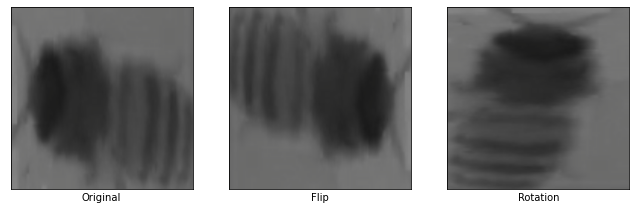

In [13]:

plt.figure(figsize=(15,7))

def ShowSpecificImage(id, labelToShow, cont):
  plt.subplot(1, 4,  cont, xticks = [], yticks = [])
  image, _ = dataset.__getitem__(id)
  image = image.numpy().transpose((1, 2, 0))
  mean = np.array([0.5, 0.5, 0.4])
  std = np.array([0.2, 0.2, 2])
  image = image * std + mean
  image = np.clip(image, 0., 1.)
  plt.imshow(image)
  plt.xlabel(labelToShow)

cont = 1
addToID = 4620
randomID = random.randint(0,addToID)
print("Random ID generated: " + str(randomID))
labelsToShow = ["Original", "Flip", "Rotation"]
for i in range(3):
  ShowSpecificImage( randomID+(i*addToID), labelsToShow[i], cont )
  cont += 1


# Dividing Dataset

In [14]:

USE_FILE_SAVED = False

if (USE_FILE_SAVED):
  with open("/content/drive/MyDrive/bee_dataset/splitCreated.pkl", "rb") as f:
      train, test = pickle.load(f)
  print("We use the file saved on Google Drive")
else:
  train, test  = train_test_split(np.arange(len(originalDataset.targets)), test_size=0.3, stratify=originalDataset.targets)
  train = np.hstack([train,np.arange(len(originalDataset.targets),len(all_targets))])
  np.random.shuffle(train)

  with open("/content/drive/MyDrive/bee_dataset/splitCreated.pkl", "wb") as f:
      pickle.dump([train, test], f)
  
  print("We created a new file, we saved on Google Drive")

trainSampler = torch.utils.data.SubsetRandomSampler(train)
testSampler = torch.utils.data.SubsetRandomSampler(test)

print("\nLength of train set   :  ", len(trainSampler))
print("Length of test set    :  ", len(testSampler) , "\n")

#
# About batch size

batch_size = 32
images_to_print_by_batch = 2

data_train_len = torch.utils.data.DataLoader(dataset, batch_size= batch_size, shuffle = False, sampler=trainSampler)
data_test_len = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=False, sampler=testSampler)

print("Number of training batches", len(data_train_len))
print("Number of test batches", len(data_test_len))



We created a new file, we saved on Google Drive

Length of train set   :   12474
Length of test set    :   1386 

Number of training batches 390
Number of test batches 44


### Function to show images

In [15]:
 
def show_images(images,labels,preds):
    plt.figure(figsize=(15, 7))
    for i , image in enumerate(images):
       if (i < images_to_print_by_batch):
            plt.subplot(1,images_to_print_by_batch+1,i+1, xticks = [], yticks= [])
            image = image.numpy().transpose((1, 2, 0))
            mean = np.array([0.5, 0.5, 0.4])
            std = np.array([0.2, 0.2, 2])
            image = image*std + mean
            image = np.clip(image,0.,1.)
            plt.imshow(image)
            
            colorr = "green"
            if(preds[i] != labels[i]):
                colorr="red"
                
            plt.xlabel(f'{CLASS_NAMES[int(labels[i].numpy())]}')
            plt.ylabel(f'{CLASS_NAMES[int(preds[i].numpy())]}', color=colorr)
    plt.tight_layout()
    plt.show()
    
def test_predicts():
    resnet18.eval()
    images, labels = next(iter(data_test_len))
    images, labels = images.to(device), labels.to(device)
    outputs = resnet18(images)
    _, preds = torch.max(outputs, 1)
    show_images(images.to('cpu'), labels.to('cpu'), preds.to('cpu'))
    

# Model

In [16]:
def default_device():
  if torch.cuda.is_available():
    print("We will use GPU")
    return torch.device("cuda:0")
  else:
    print("We will use CPU")
    return torch.device("cpu")
device=default_device()

We will use GPU


### Checkpoints to load and save progress

In [17]:

PATH = "/content/drive/MyDrive/bee_dataset/model.pt"

def saveCheckpoint(epoch, loss, step):
  torch.save({
              'epoch': epoch,
              'model_state_dict': resnet18.state_dict(),
              'optimizer_state_dict': optimizer.state_dict(),
              'loss': loss,
              'step': step
              }, PATH)


def loadCheckpoint():
  checkpoint = torch.load(PATH, map_location=device)
  resnet18.load_state_dict(checkpoint['model_state_dict'])
  optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
  return checkpoint['epoch'], checkpoint['loss'], checkpoint['step']


### Loading Resnet18

In [18]:

def Resnet18():
  return torchvision.models.resnet18(pretrained=True)


In [19]:

resnet18 = Resnet18()

resnet18.fc = torch.nn.Linear(in_features=512, out_features=len(CLASS_NAMES))
loss_fn = torch.nn.CrossEntropyLoss() 

optimizer = torch.optim.Adam(resnet18.parameters(), lr=3e-5)
resnet18.to(device)

# e, loss, step = loadCheckpoint()  

# print(f'Epoch: {e}')
# print(f'Loss: {loss}')
# print(f'Step: {step}')


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### Function to Train

In [20]:

def train(epochs, epoch_inicial = 0, train_step_inicial = 0, loss_inicial = 0.):
    print('Starting training..')
    for e in range(epoch_inicial, epochs):
        print('='*20)
        print(f'Starting epoch {e + 1}/{epochs}')
        print('='*20)

        train_loss = loss_inicial
        val_loss = 0.
        print(0)  # This print is necessary to run in Colab
        resnet18.train() # set model to training phase
        print(1)  # This print is necessary to run in Colab
        for train_step, (images, labels) in enumerate(data_train_len):
            if train_step < train_step_inicial: continue 

            images2, labels = images.to(device), labels.to(device)

            optimizer.zero_grad()
            
            outputs = resnet18(images2)
            
            loss = loss_fn(outputs, labels)
            
            loss.backward()
            
            optimizer.step()
            train_loss += loss.item()
            print("> "+ str(train_step))
            
            if train_step % 20 == (train_step_inicial%20):
                print('Evaluating at step', train_step)

                accuracy = 0
                cm = np.zeros((len(CLASS_NAMES),len(CLASS_NAMES)),  dtype=int)

                resnet18.eval() # set model to eval phase

                for val_step, (images, labels) in enumerate(data_test_len):
                    print("val_step actual: " + str(val_step))
                    images2, labels = images.to(device), labels.to(device)
                    outputs = resnet18(images2)

                    loss = loss_fn(outputs, labels)
                    val_loss += loss.item()

                    _, preds = torch.max(outputs, 1)
                    preds = preds.to('cpu')
                    labels = labels.to('cpu')
                    #accuracy += sum((preds == labels).numpy()) # Acá se cambia para clases
                    cm = np.add(cm,confusion_matrix(labels, preds, labels=range(len(CLASS_NAMES)))) 
                    

                val_loss /= (val_step + 1)
                #accuracy = accuracy/len(test_dataset)
                accuracy = np.sum(cm.diagonal()) / np.sum(cm)
                cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
                accuracyPorClase = cm.diagonal()
                print(f'Validation Loss: {val_loss:.4f}, Accuracy General: {accuracy:.4f}')
                for i, className in enumerate(CLASS_NAMES):
                  print(f'{i} - Accuracy {className}: {accuracyPorClase[i]:.4f}')

                test_predicts()

                resnet18.train()

                if accuracy >= 0.98:
                    print('Performance condition satisfied, stopping..')
                    return
        print(8)  # This print is necessary to run in Colab
        train_loss /= (train_step + 1)
        
        saveCheckpoint(epoch=e, loss=train_loss, step=train_step )
        print(9)  # This print is necessary to run in Colab
        print(f'Training Loss: {train_loss:.4f}')
        
    print('Training complete..')


# Train and Test

### Training

Starting training..
Starting epoch 1/2
0
1


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


> 0
Evaluating at step 0
val_step actual: 0
val_step actual: 1
val_step actual: 2
val_step actual: 3
val_step actual: 4
val_step actual: 5
val_step actual: 6
val_step actual: 7
val_step actual: 8
val_step actual: 9
val_step actual: 10
val_step actual: 11
val_step actual: 12
val_step actual: 13
val_step actual: 14
val_step actual: 15
val_step actual: 16
val_step actual: 17
val_step actual: 18
val_step actual: 19
val_step actual: 20
val_step actual: 21
val_step actual: 22
val_step actual: 23
val_step actual: 24
val_step actual: 25
val_step actual: 26
val_step actual: 27
val_step actual: 28
val_step actual: 29
val_step actual: 30
val_step actual: 31
val_step actual: 32
val_step actual: 33
val_step actual: 34
val_step actual: 35
val_step actual: 36
val_step actual: 37
val_step actual: 38
val_step actual: 39
val_step actual: 40
val_step actual: 41
val_step actual: 42
val_step actual: 43
Validation Loss: 1.6689, Accuracy General: 0.2626
0 - Accuracy Ant problems: 0.4161
1 - Accuracy Few varr

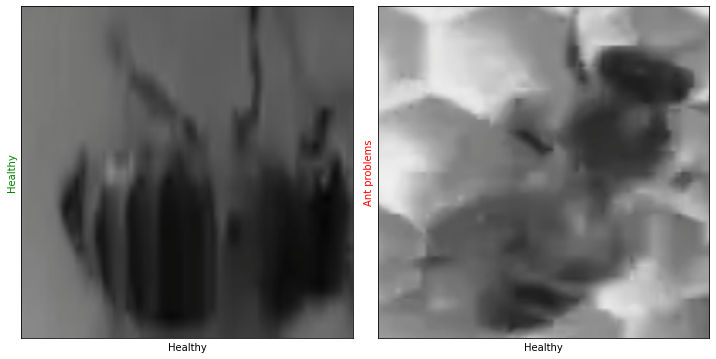

> 1
> 2
> 3
> 4
> 5
> 6
> 7
> 8
> 9


In [ ]:
%%time
train(epochs = 2)

# train(epochs=2, epoch_inicial=e, train_step_inicial=step, loss_inicial=loss)

# Data load

# Convolutional Neural Network 


In [ ]:
"""
def Resnet18():
  return torchvision.models.resnet18(pretrained=True)

In [ ]:
"""
class SSIMLoss(SSIM):
    def forward(self, x, y):
        x = torch.sigmoid(x)
        y = torch.sigmoid(y)
        
        return 1. - super().forward(x, y)


In [ ]:
"""

resnet18 = Resnet18()

# resnet18.fc = torch.nn.Linear(in_features=512, out_features=4)  # SE DEBE USAR, revisar uso en proyecto 02
# loss_fn = torch.nn.CrossEntropyLoss()    # SE DEBE USAR, revisar uso en proyecto 02
if torch.cuda.is_available():
  loss_fn = SSIMLoss().to(device)
else:
  loss_fn = SSIMLoss()

optimizer = torch.optim.Adam(resnet18.parameters(), lr=3e-5)
resnet18.to(device)




In [ ]:
"""
tf.test.gpu_device_name()
device_lib.list_local_devices()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device, torch.cuda.is_available())

In [ ]:
"""
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0
    train_acc = []
    val_acc = []

    # Getting last training step
    try:
      with open('drive/MyDrive/resnet18_covid.pkl', 'rb') as f:
          last_epoch, train_acc, val_acc = pickle.load(f)
          model = torch.load('drive/MyDrive/resnet18_covid.pth')
          best_model_wts = copy.deepcopy(model.state_dict())
          print('Previous stage was found, starting from {} of {}.'.format(last_epoch, num_epochs))
    except Exception as err:
      print(err)
      last_epoch = 0
      print('No previous stage was found, starting from 0 of {}.'.format(num_epochs))
      input('Start from 0?')

    for epoch in range(last_epoch, num_epochs):
        print('Epoch {}/{}'.format(epoch+1, num_epochs))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            if phase == 'train':
              train_acc.append(epoch_acc)
            else:
              val_acc.append(epoch_acc)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()
        # Save model
        torch.save(model_ft, 'drive/MyDrive/resnet18_covid.pth')
        # Save training step
        with open('drive/MyDrive/resnet18_covid.pkl', 'wb') as f:
          pickle.dump([epoch+1, train_acc, val_acc], f)

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, train_acc, val_acc

In [ ]:
"""
model_ft = models.resnet18(pretrained=True)
num_ftrs = model_ft.fc.in_features

# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [ ]:
"""
model_ft, train_acc, val_acc = train_model(
    model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=25)
print('Training Acc: {}'.format(max(train_acc)))
print('Valitation Acc: {}'.format(max(val_acc)))

# Metrics and heatmap
After training NN, the following methods help us to get an idea about how the NN tries to get the right class. 

1.   Confusion matriz
2.   Metrics: Accuracy, F1, Recall, Support
3.   Heatmaps: Saliency-Maps, Score Class Activation Mapping (CAM), Layer-Wise Relevance Propagation




In [ ]:
"""
import torch
import torch.nn.functional as F
from statistics import mode, mean

class SaveValues():
    def __init__(self, m):
        # register a hook to save values of activations and gradients
        self.activations = None
        self.gradients = None
        self.forward_hook = m.register_forward_hook(self.hook_fn_act)
        self.backward_hook = m.register_backward_hook(self.hook_fn_grad)

    def hook_fn_act(self, module, input, output):
        self.activations = output

    def hook_fn_grad(self, module, grad_input, grad_output):
        self.gradients = grad_output[0]

    def remove(self):
        self.forward_hook.remove()
        self.backward_hook.remove()


class CAM(object):
    """ Class Activation Mapping """

    def __init__(self, model, target_layer):
        """
        Args:
            model: a base model to get CAM which have global pooling and fully connected layer.
            target_layer: conv_layer before Global Average Pooling
        """

        self.model = model
        self.target_layer = target_layer

        # save values of activations and gradients in target_layer
        self.values = SaveValues(self.target_layer)

    def forward(self, x, idx=None):
        """
        Args:
            x: input image. shape =>(1, 3, H, W)
        Return:
            heatmap: class activation mappings of the predicted class
        """

        # object classification
        score = self.model(x)

        prob = F.softmax(score, dim=1)

        if idx is None:
            prob, idx = torch.max(prob, dim=1)
            idx = idx.item()
            prob = prob.item()
            print("predicted class ids {}\t probability {}".format(idx, prob))

        # cam can be calculated from the weights of linear layer and activations
        weight_fc = list(
            self.model._modules.get('fc').parameters())[0].to('cpu').data

        cam = self.getCAM(self.values, weight_fc, idx)

        return cam, idx

    def __call__(self, x):
        return self.forward(x)


    def getCAM(self, values, weight_fc, idx):
        '''
        values: the activations and gradients of target_layer
            activations: feature map before GAP.  shape => (1, C, H, W)
        weight_fc: the weight of fully connected layer.  shape => (num_classes, C)
        idx: predicted class id
        cam: class activation map.  shape => (1, num_classes, H, W)
        '''

        cam = F.conv2d(values.activations, weight=weight_fc[:, :, None, None])
        _, _, h, w = cam.shape

        # class activation mapping only for the predicted class
        # cam is normalized with min-max.
        cam = cam[:, idx, :, :]
        cam -= torch.min(cam)
        cam /= torch.max(cam)
        cam = cam.view(1, 1, h, w)

        return cam.data


class ScoreCAM(CAM):
    """ Score CAM """

    def __init__(self, model, target_layer, n_batch=32):
        super().__init__(model, target_layer)
        """
        Args:
            model: a base model
            target_layer: conv_layer you want to visualize
        """
        self.n_batch = n_batch

    def forward(self, x, idx=None):
        """
        Args:
            x: input image. shape =>(1, 3, H, W)
            idx: the index of the target class
        Return:
            heatmap: class activation mappings of predicted classes
        """

        with torch.no_grad():
            _, _, H, W = x.shape
            device = x.device

            self.model.zero_grad()
            score = self.model(x)
            prob = F.softmax(score, dim=1)

            if idx is None:
                p, idx = torch.max(prob, dim=1)
                idx = idx.item()
                # print("predicted class ids {}\t probability {}".format(idx, p))

            # # calculate the derivate of probabilities, not that of scores
            # prob[0, idx].backward(retain_graph=True)

            self.activations = self.values.activations.to('cpu').clone()
            # put activation maps through relu activation
            # because the values are not normalized with eq.(1) without relu.
            self.activations = F.relu(self.activations)
            self.activations = F.interpolate(
                self.activations, (H, W), mode='bilinear')
            _, C, _, _ = self.activations.shape

            # normalization
            act_min, _ = self.activations.view(1, C, -1).min(dim=2)
            act_min = act_min.view(1, C, 1, 1)
            act_max, _ = self.activations.view(1, C, -1).max(dim=2)
            act_max = act_max.view(1, C, 1, 1)
            denominator = torch.where(
                (act_max - act_min) != 0., act_max - act_min, torch.tensor(1.)
            )

            self.activations = self.activations / denominator

            # generate masked images and calculate class probabilities
            probs = []
            for i in range(0, C, self.n_batch):
                mask = self.activations[:, i:i+self.n_batch].transpose(0, 1)
                mask = mask.to(device)
                masked_x = x * mask
                score = self.model(masked_x)
                probs.append(F.softmax(score, dim=1)[:, idx].to('cpu').data)

            probs = torch.stack(probs)
            weights = probs.view(1, C, 1, 1)

            # shape = > (1, 1, H, W)
            cam = (weights * self.activations).sum(1, keepdim=True)
            cam = F.relu(cam)
            cam -= torch.min(cam)
            cam /= torch.max(cam)

        return cam.data, idx

    def __call__(self, x):
        return self.forward(x)

In [ ]:
"""
target_layer = model_ft.layer4[1].conv2
wrapped_model = ScoreCAM(model_ft, target_layer)

image_num = 10
images = [
  data_dir+'/val/covid/COVID-{}.png'.format(112),
  data_dir+'/val/lung_opacity/Lung_Opacity-{}.png'.format(11),
  data_dir+'/val/normal/Normal-{}.png'.format(11),
  data_dir+'/val/viral_pneumonia/Viral Pneumonia-{}.png'.format(330)
]

for p in images:
  plt.figure(figsize=(15, 15))
  # plt.subplot(1, 1, 1)
  plt.axis('off')
  img = Image.open(p).convert('RGB')
  tensor = data_transforms['plot'](img).unsqueeze(0)
  cam, idx = wrapped_model(tensor.cuda())
  h_img = reverse_normalize(tensor)
  heatmap_ = visualize(h_img, cam, cv2.COLORMAP_JET)
  hm = (heatmap_.squeeze().numpy().transpose(1, 2, 0))
  # imshow(hm, cmap='jet')
  plt.imshow(img)
  plt.figure(figsize=(15, 15))
  # plt.subplot(2, 1, 2)
  plt.axis('off')
  plt.imshow(hm)
  plt.show()

In [ ]:
"""
fig = plt.figure(figsize=(10,5))
plt.figure(figsize=(14, 10))
plt.rcParams.update({'font.size': 24})
plt.title("Train-Validation Accuracy")
plt.plot(train_acc, label='train')
plt.plot(val_acc, label='validation')
plt.xlabel('num_epochs', fontsize=24)
plt.ylabel('accuracy', fontsize=24)
plt.legend(loc='best')
plt.ylim([0.8, 1])

In [ ]:
"""
def reverse_normalize(x, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]):
    x[:, 0, :, :] = x[:, 0, :, :] * std[0] + mean[0]
    x[:, 1, :, :] = x[:, 1, :, :] * std[1] + mean[1]
    x[:, 2, :, :] = x[:, 2, :, :] * std[2] + mean[2]
    return x

def visualize(img, cam, cmap):
    """
    #Synthesize an image with CAM to make a result image.
    #Args:
#        img: (Tensor) shape => (1, 3, H, W)
#        cam: (Tensor) shape => (1, 1, H', W')
#    Return:
#        synthesized image (Tensor): shape =>(1, 3, H, W)
    """

    _, _, H, W = img.shape
    cam = F.interpolate(cam, size=(H, W), mode='bilinear', align_corners=False)
    cam = 255 * cam.squeeze()
    heatmap = cv2.applyColorMap(np.uint8(cam), cmap)
    heatmap = torch.from_numpy(heatmap.transpose(2, 0, 1))
    heatmap = heatmap.float() / 255
    b, g, r = heatmap.split(1)
    heatmap = torch.cat([r, g, b])

    result = heatmap + img.cpu()
    result = result.div(result.max())

    return result